In [5]:
# have trouble getting auc up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import sys
import imblearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

from numpy import mean

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import pandas
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression

#look at requirement already satisfied


In [6]:
df = pd.read_csv("term-deposit-marketing-2020.csv")

In [7]:
df.head()
#maintain the column name , don't change the excel data sheet. how to read and change datasheet in python. 

#which is continuous and which is category? category , did you get a loan or not? 

# Using columns attribute. 1 = yes, no = 0    

#x1 age = continuous    

#x2 job = categorical       

#x3 marital =  categorical  

#x4 education = categorical

#x5 default = categorical

#x6 balance = continuous                                    

#x7 housing = categorical

#x8 loan    = categorical

#x9 contact = categorical

#x10 day   = continuous

#x11 month  = categorical

#x12 duration  = continous 

#x13 campaign   = continuous (includes last contact)

#y independent variable subscribed = categorical

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [8]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [9]:
df.describe()

#Continuous columns described

# x1 age mean = 40.54

#x6 balance mean = 1274.27

#x10 day mean = 16.01

#x12 duration mean= 2.88

#x13 campaign mean = 2.88


,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [10]:
#this is for categorical values.

df.job.unique()





array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [11]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [12]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [13]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [14]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [15]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [16]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [17]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [18]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [19]:
df['y'] = df['y'] == 'yes'

In [20]:
#creating subscribed to term deposit yes =1 and no = 0. This lets us seperate between subscribed and not subscribed. 
df_yes = df[df['y'] == 1]
df_no = df[df['y'] == 0]
#undersampling? how to deal with class imbalance?
# around 7.2% are have subscribed and 92.7% have not subscribed. one class has 7.2% (minority), the other class has 92.7% (majority). Data is imbalanced, might get good accuracy. Model will always pick the majority class aggressively versus minority class.  
df[df['y']==0]['y'].count(), df[df['y']==1]['y'].count()

(37104, 2896)

In [21]:
#once you are done with eda, get percentages of dependent variable
#realize its undersampling
#do a stratified split of the entire dataset that I have. train test split . 
#df train df test 70/30 is stratified. find a stratified split 
#df train dataframe, random undersampling for the majority class. 
#run a model, random forest , xgboost, 
# test model with df dataset that is seperate
# drawback of oversampling it can overfit model
#drawback of undersample. you can loose some information. need to ensure that you have enough data. 

In [22]:
#only x train y train sampling
#create single data set of x train and y train
#axis = 0 is row wise up and down 
#axis =1 is side by side 

In [23]:
X = df.drop('y', axis=1)
y = df.y
    
logReg = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28000, 13) (12000, 13) (28000,) (12000,)


In [29]:
# class count
class_count_0, class_count_1 = df['y'].value_counts()        #y_train to get value counts, not data['y'].value_counts()

# Separate class
class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (37104, 14)
class 1: (2896, 14)


total class of 1 and 0: False    2896
True     2896
Name: y, dtype: int64


Text(0, 0.5, 'Count')

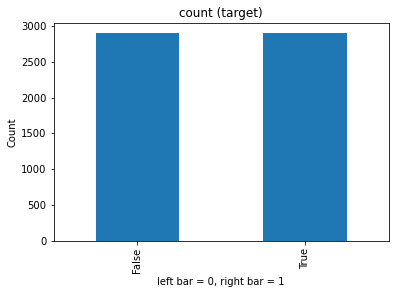

In [30]:
#True stands for 1 while false stands for 0

class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis = 0)

print("total class of 1 and 0:",test_under['y'].value_counts())# plot the count after under-sampeling
test_under['y'].value_counts().plot(kind='bar', title='count (target)')
plt.xlabel("left bar = 0, right bar = 1")
plt.ylabel("Count")

total class of 1 and 0: False    2896
True     2896
Name: y, dtype: int64


Text(0, 0.5, 'Count')

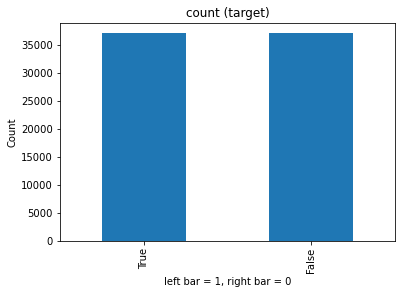

In [31]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['y'].value_counts())# plot the count after under-sampeling
test_over['y'].value_counts().plot(kind='bar', title='count (target)')
plt.xlabel("left bar = 1, right bar = 0")
plt.ylabel("Count")


In [32]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({False: 37104, True: 2896})
Resample dataset shape Counter({False: 2896, True: 2896})


In [45]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({False: 37104, True: 2896})
Resample dataset shape Counter({False: 37104, True: 37104})


In [37]:
# import library
from imblearn.under_sampling import TomekLinks

tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({False: 37104, True: 2896})
Resample dataset shape Counter({False: 37104, True: 37104})


In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(X, y)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

D:\Downloads\Anucleus\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    tech

ValueError: could not convert string to float: 'management'

In [53]:
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(x_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ValueError: could not convert string to float: 'blue-collar'

In [28]:
#We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

#What makes the customers buy? Tell us which feature we should be focusing more on. 